In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from glob import glob

In [8]:
data_paths = tf.io.matching_files('dataset/mnist_png/training/*/*.png')

In [9]:
path = data_paths[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'dataset\\mnist_png\\training\\0\\1.png'>

## Load Image

In [10]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [11]:
image.shape

TensorShape([28, 28, 1])

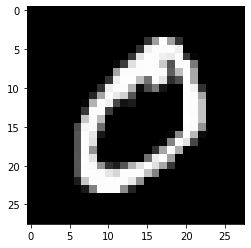

In [14]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

## Set Data Generator

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
inputs = image[tf.newaxis, ...]

In [17]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

0.0 253.9095 39.672913


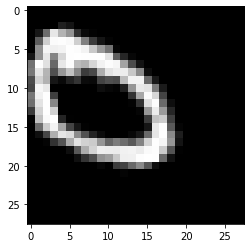

In [18]:
result = next(iter(datagen.flow(inputs)))

print(np.min(result), np.max(result), np.mean(result))

plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

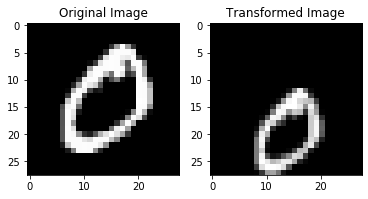

In [27]:
datagen = ImageDataGenerator(
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.5
)

result = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(inputs[0, :, :, 0], 'gray')
plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Rescale시 주의사항

In [20]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)